In [ ]:
!pip3 install -r req.txt

### Neste notebook:

A fim de exercitar os conhecimentos sobre VQA:

__1__ Vamos tomar como exercício preparar o estado $|1\rangle$ partindo do estado $|0\rangle$ e usando as portas $R_x$ e $R_y$ como os parâmetros a serem otimizados.

__2__ Depois disso será preparado o estado $|0\rangle$ para voltar ao estado inicial.

__3__ Usaremos estados aleatórios como estado inicial, preparar este estado usando VQA e calcular a fidelidade media obtida.

# Estados puros

A partir de um estado inicial $|\psi_0\rangle = |0\rangle^{\otimes N}$ desejamos otimizar um circuito U que leva de $|\psi\rangle$ para um estado preparado $|\phi\rangle$, ou seja:

$|\phi\rangle = U(\theta_1, \theta_2, \dots, \theta_n)|\psi_0\rangle $

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from qiskit_textbook.widgets import plot_bloch_vector_spherical
from qiskit import QuantumCircuit


# (1)

* Vamos construir um estado $ |\psi\rangle =  c_0|0\rangle + c_1|1\rangle$

In [3]:
# Para obter o estado 1 escolhemos os seguintes valores de c:
c0 = 0
c1 = 1
target_state = np.array([[c0],[c1]])
print(target_state)

[[0]
 [1]]


Podemos escrever um estado de 1 qubit como $|\psi\rangle = \cos{\theta/2}|0\rangle + e^{i\phi}\sin{\theta/2}|1\rangle$

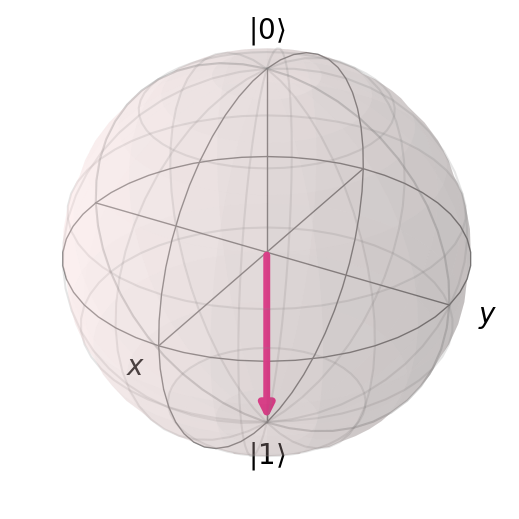

In [4]:
theta = 2*np.arccos(c0)
target_expectedValue = np.cos(theta)
phi = 0
coords = [theta, phi, 1]
# print(target_expectedValue)
plot_bloch_vector_spherical(coords)

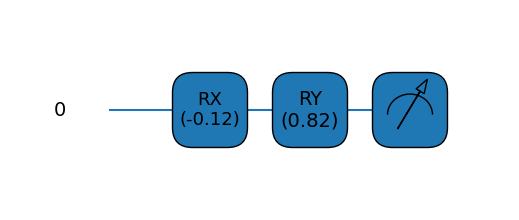

In [5]:
device = qml.device('qiskit.aer', wires=1, backend='qasm_simulator')

params = np.random.normal(0, np.pi/2, (2), requires_grad=True)

@qml.qnode(device, diff_method='parameter-shift')

def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)

    return qml.expval(qml.PauliZ(0))

fig, ax = qml.draw_mpl(circuit, decimals=2)(params)
plt.show()

In [6]:
def loss(params):
    L = abs(target_expectedValue - circuit(params))
    return L
opt = qml.AdamOptimizer(stepsize=0.01)

In [ ]:
for i in range(256):
    print(loss(params), circuit(params), target_expectedValue)
    params = opt.step(loss, params)

In [11]:
print(params, circuit(params))

[2.13358324e-03 3.01053139e+00] -0.99609375


In [ ]:

qc = QuantumCircuit(1)
qc.rx(params[0].item(),0)
qc.ry(params[1].item(),0)

from qiskit.visualization import visualize_transition
visualize_transition(qc)


# (2)

In [12]:
c0 = 1
c1 = 0
target_state = np.array([[c0],[c1]])
print(target_state)

[[1]
 [0]]


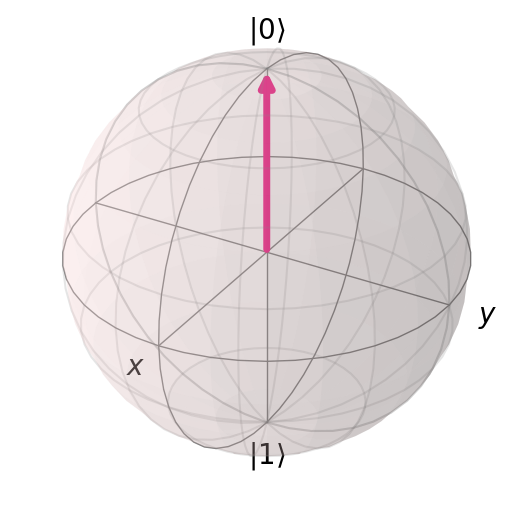

In [13]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
theta = 2*np.arccos(c0)
target_expectedValue = np.cos(theta)
phi = 0
coords = [theta, phi, 1]
# print(target_expectedValue)
plot_bloch_vector_spherical(coords)

In [ ]:
for i in range(400):
    print(loss(params), circuit(params), target_expectedValue)
    params = opt.step(loss, params)

In [15]:
print(params, circuit(params))

[-0.0062179   0.03302733] 1.0


In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.rx(params[0].item(),0)
qc.ry(params[1].item(),0)

from qiskit.visualization import visualize_transition
visualize_transition(qc)

# (3)

Para calcular a média da fidelidade obtida, é indicado:
* criar as funções que executam essa preparação

In [ ]:
# gerando os estados aleatórios
# c0 = np.random.rand()**0.5
# c1 = (1.0 - c0**2)**0.5